<a href="https://colab.research.google.com/github/emna22hmd/CognoRise-InfoTech/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: House Price Prediction**
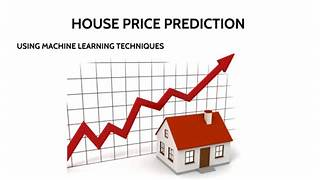


**Algorithms**: Linear Regression,random forest regression ,decision tree regression,
gradient boosting regressor


**Description**: Predict house prices based on features like area, number of bedrooms,
and location.

---



# **Context**

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic state of a country. Considering the data provided, we are wrangling a large set of property sales records.

Link of the dataset: https://www.kaggle.com/datasets/shree1992/housedata

# **Importing libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# **Reading and analysing the data**

In [ ]:
! unzip HousePriceData.zip

Archive:  HousePriceData.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
data=pd.read_csv("data.csv")

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


# **Data Visualisation**

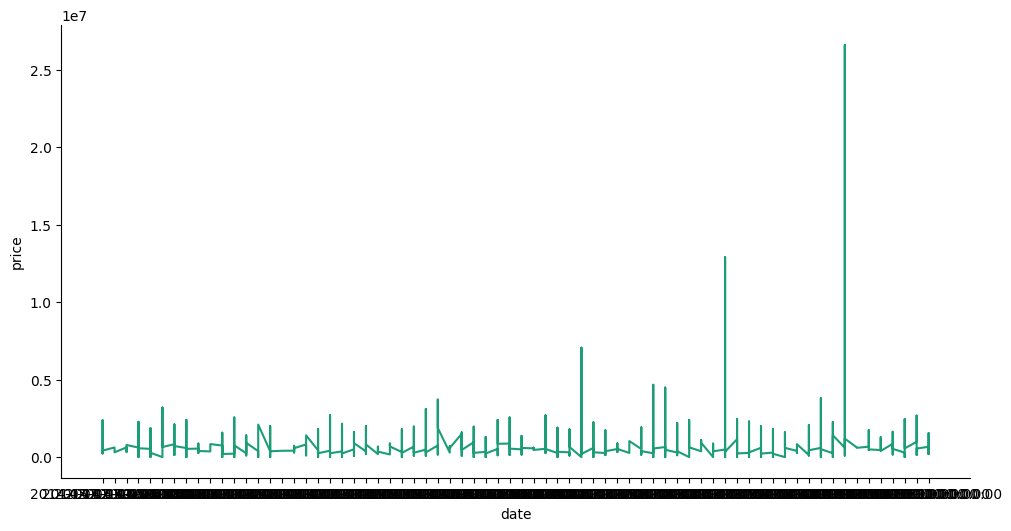

In [ ]:
# @title date vs price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('price')

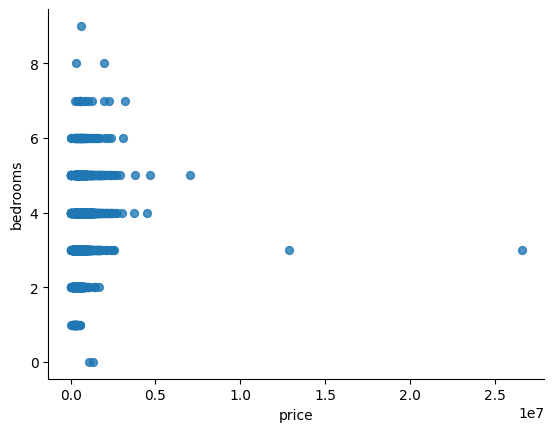

In [ ]:
# @title price vs bedrooms

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='price', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
if 'price' not in data.columns:
    raise ValueError("The 'price' column is missing from the dataset.")

In [ ]:
X['date'] = pd.to_datetime(X['date'])
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day_of_week'] = X['date'].dt.dayofweek
X['is_weekend'] = X['day_of_week'].isin([5, 6]).astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year', 'month', 'day_of_week', 'is_weekend'],
      dtype='object')
Columns in X_test: Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year', 'month', 'day_of_week', 'is_weekend'],
      dtype='object')


In [ ]:
!pip install category_encoders # Install the missing library
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['street', 'city', 'statezip', 'country'])
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00


# **Experimenting with pipelines**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define preprocessing steps
categorical_features = ['street', 'city', 'statezip', 'country']
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Iterate over models, create a pipeline, fit, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")



Training Gradient Boosting Regressor...
Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 967153734621.6338
Mean Absolute Error (MAE): 163097.4577030901
R² Score: 0.051667200630271526

Training Random Forest Regressor...
Random Forest Regressor Metrics:
Mean Squared Error (MSE): 970849839971.7784
Mean Absolute Error (MAE): 155838.60585074595
R² Score: 0.04804302196250332

Training Linear Regression...
Linear Regression Metrics:
Mean Squared Error (MSE): 4583385371249.853
Mean Absolute Error (MAE): 918842.9175715717
R² Score: -3.494192106292269

Training Decision Tree Regressor...
Decision Tree Regressor Metrics:
Mean Squared Error (MSE): 998654381840.7173
Mean Absolute Error (MAE): 188260.1328879804
R² Score: 0.020779560031004785


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Define preprocessing steps
categorical_features = ['street', 'city', 'statezip', 'country']
numeric_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

The **dataset** that we used is **heterogeneous** because we have features that are not numerical such as "date", "street", "city", "statezip" and "country". And this require specific techniques tailored to each data type.

# **Preprocessing**

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
# Fixing the 'date' column
X['date'] = pd.to_datetime(X['date'])  # Convert to datetime object
X['date'] = (X['date'] - X['date'].min()).dt.days  # Convert to days since the earliest date


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Fixing the 'street' column
X_train['street'] = X_train['street'].factorize()[0]
X_test['street'] = X_test['street'].factorize()[0]

In [ ]:
# Fixing the 'city' column
X_train['city'] = X_train['city'].factorize()[0]
X_test['city'] = X_test['city'].factorize()[0]

In [ ]:
# Fixing the 'statezip' column
X_train['statezip'] = X_train['statezip'].factorize()[0]
X_test['statezip'] = X_test['statezip'].factorize()[0]

In [ ]:
# Fixing the 'country' column
X_train['country'] = X_train['country'].factorize()[0]
X_test['country'] = X_test['country'].factorize()[0]

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

3.0661574420124324e+19

In [ ]:
mean_absolute_error(y_test,y_pred)

183076.91972954292

Hyper-parameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

In [ ]:
# Linear Regression
lr = LinearRegression()
param_grid_lr = {
    'fit_intercept': [True, False],
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)
print("Best Parameters for Linear Regression:", grid_search_lr.best_params_)

Best Parameters for Linear Regression: {'fit_intercept': True}


In [ ]:
lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

3.0661574420124324e+19

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.05896131306474384


hyper-parameters tuning

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_pred = grid_search_rf.predict(X_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.06419835200083801


**Comparing the actual values VS the predicted values of the RF model**

In [ ]:
y_test_list = list(y_test)

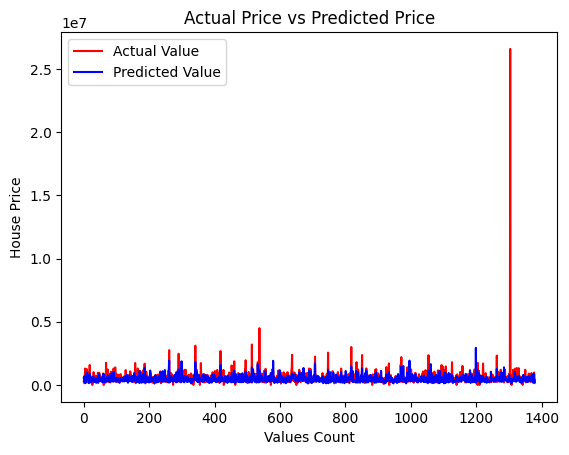

In [ ]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Values Count')
plt.ylabel('House Price')
plt.legend()
plt.show()

# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# evaluate the model on training sample
dtr.score(X_train,y_train)

0.4079450344557428

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.01558328, 0.00925016, 0.00899625, 0.00892067, 0.01008296]),
 'score_time': array([0.00246859, 0.00232124, 0.00229335, 0.00271416, 0.00337625]),
 'test_score': array([0.31143509, 0.23047347, 0.11197482, 0.48326587, 0.42428463])}

hyper-parameters tuning

In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


# **gradient boosting regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 577971205088.0321
Mean Absolute Error (MAE): 214979.96675368608
R² Score: 0.07743303023230108


hyper-parameters tuning

In [ ]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)
print("Best Parameters for Gradient Boosting:", grid_search_gbr.best_params_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


While we made efforts to improve the data quality through preprocessing, some limitations (unexpected formats, not well-structured) in the original dataset may have impacted the models' performance. Future work could focus on acquiring higher-quality data or further refining the data preprocessing steps to enhance results.